## Phase 4.41 - 4.42

# Tensorflow, Deep Neural Networks

## Objectives
- Get some <a href='#background'>background</a> in Tensorflow, Keras (and PyTorch).
- Look at <a href='#tensors'>Tensors</a> and how they're used.
- Start working in <a href='#tensorflow'>Tensorflow</a>!
    - <a href='#preprocessing'>Processing Data</a>.
    - Various methods of <a href='#tuning'>building and tuning a Model</a>.

# Tensorflow / Keras
<a id='background'></a>
## Background

- Keras is an API coded in Python.
- There are three systems built on the Keras API: *Tensorflow*, *Theano*, *CNTK*.
    - *Theano has been discontinued. The last release was 2017, but can still be used.*
- Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras.
- **We will use TensorFlow**, as it is the most popular. TensorFlow became the most used Keras backend, and eventually integrated Keras into via the tf.keras submodule of TensorFlow.


> *PyTorch is the leading competitor to Tensorflow based on interest and usage.*
>
> *Many higher education institutions are teaching deep learning via PyTorch. Although not at all necessary to know both, I would recommend to keep PyTorch in your mind and perhaps add to your repertoire as a Data Scientist.*

<a id='tensors'></a>
# Tensors
<img src='./images/tensors.png' width=600>

> **Left:** A "Column"
>
> **Middle:** A "DataFrame"
>
> **Right:** A "multi-dimensional DataFrame". *Most commonly images.*

## Tensors as *Images*

- A Black and White image can be represented as a tensor of shape *$\large (m, n)$* where coordinate $\large (m_i, n_i)$ points to a *pixel*.
<img src='./images/bw_pixel.jpeg' width=300>

- A Color image (rgb) can be represented as a tensor of shape *$\large (m, n, 3)$* where a coordinate $\large (m_i, n_i, r)$ would point to a pixel in layer $\large r$ and $\large (m_i, n_i, b)$ would point to a pixel in layer $\large b$.
<img src='./images/rgb_example.png'>

## Tensors as *Game-States*

> - **AlphaZero**, Google's Reinforcement Learning Neural Network was trained to play games (Go, Chess, Shogi, Starcraft II, others). 
> - This is a two-part model:
    1. A Neural Network and 
    2. a Monte Carlo Tree Search algorithm.
    
    
- 3-dimensional tensors are used as an input and output for the neural network.


- Input is a tensor of shape *$\large (N, N, (MT + L))$*.
    - $N x N$ represents the shape of the board.
        - (8, 8) for chess: *[1-8, a-h]*.
    - $T$ represents a *time-step* for the game.
        - The previous 8-game positions are stored and fed as an input.
    - $M$ represents a binary representation of the presence of the player's pieces on the board, one for each piece-type.
        - 6 piece-types for chess: Pawn, Knight, Bishop, Rook, Queen, King
    - $L$ represents a number of constant-vaues input plantes, denoting aspects of the game-state.
        - Player's color, total move count, special rules (castling, repetition count for that specific position, number of moves "without progress").

<img src='./images/alphazero_input.png' width=500>

#### Fun Facts:
> Match Results: Google's Deep Mind project **AlphaZero** vs reigning WCCC Champion **Stockfish**.
>
> | Game | White | Black | Win | Draw | Loss |
> | ---- | ----- | ----- | --- | ---- | ---- |
> | Chess | AlphaZero | Stockfish | 25 | 25 | 0
> | Chess | Stockfish | AlphaZero | 3 | 47 | 0
>
> - *Stockfish "calculates" 60, 000, 000 positions per second. AlphaZero "calculates" 60, 000 positions per second.*
> - *AlphaZero was trained on 9-hours of training ("self-play").*
>
> Additional Resources and Information:
> <a href='https://arxiv.org/abs/1712.01815'>Mastering Chess and Shogi [...]</a>

<a id='tensorflow'></a>
# Working with Tensorflow

**In this example, we want to be using *DataFrame-shaped* Tensors** $(m, n)$.
*In order to do this, we will want **each row to represent an entire image** and each column to represent a pixel.*

*We will talk about CNNs next - where each row is an entire image, but is **not** flattened first.* 
- E.g.: An input could be represented in shape $(1000, 64, 64, 3)$.*
```
DataShape = (
    {number of images = 1000}, 
    {number of rows (pixels) = 64}, 
    {number of columns (pixels) = 64}, 
    {number of planes (rgb) = 3}
)
```

## Loading Data

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras import layers, Sequential

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
X = digits.images
y = digits.target

In [4]:
X.shape

(1797, 8, 8)

In [5]:
y.shape

(1797,)

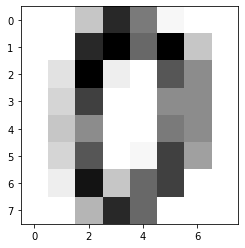

In [6]:
plt.imshow(X[0], cmap='Greys');

In [7]:
digits['data'][0].shape

(64,)

<a id='preprocessing'></a>
## Preprocessing
- Flatten each image into a row of data.
    - Alternatively, with this example, we could just use `data`.
- Train-test-split into Train, Test, Validation
    - Sizes: (0.7, 0.15, 0.15)
- Scale data to a value [0-1] (pixel intensity)


- One Hot Encode our target.

### Flattening Images

In [8]:
X[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [9]:
# Already a numpy array.
X[0].reshape(-1,)

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
X_flat = X.reshape(X.shape[0], -1)
X_flat.shape

(1797, 64)

In [11]:
# # Alternate method without using .reshape
# X_flat = np.array([x.reshape(-1,) for x in X])

In [12]:
# Sanity Check
all(digits['data'][0] == X_flat[0])

True

### Target Processing: OneHotEncoder

- Differently from scikit-learn models, Tensorflow multiclass classification models' predictions are an array (a OneHotEncoded version of a multiclass variable).
- Since we are encoding only our target (and we want this representation consistent) we can perform this before the train-test-split.

In [13]:
ohe = OneHotEncoder(sparse=False)
y_ohe = ohe.fit_transform(y.reshape(-1, 1))

In [14]:
y_ohe.shape

(1797, 10)

In [15]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])]

### Train Test Split
*My go-to train/test/val size is (0.7, 0.15, 0.15), but there is no hard and fast rule on this.*

In [16]:
SEED = 51
TEST_SIZE = int(X_flat.shape[0] * 0.15)

# Number of samples for Test and Val
TEST_SIZE

269

In [17]:
# Split out Test data first.
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y_ohe, test_size=TEST_SIZE, random_state=SEED)

# Split Val from training data.
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=TEST_SIZE, random_state=SEED)

# Sanity check.
print(f'Train:\n\tX: {X_train.shape}\n\ty: {y_train.shape}')
print(f'Test:\n\tX: {X_test.shape}\n\ty: {y_test.shape}')
print(f'Val:\n\tX: {X_val.shape}\n\ty: {y_val.shape}')

Train:
	X: (1259, 64)
	y: (1259, 10)
Test:
	X: (269, 64)
	y: (269, 10)
Val:
	X: (269, 64)
	y: (269, 10)


### Scaling Data

In [18]:
# Check the max values in each image array.
(max([x for img in X_train for x in img]),
 max([x for img in X_test for x in img]),
 max([x for img in X_val for x in img]))

(16.0, 16.0, 16.0)

*Since pixel data exists with constraints (255 is the maximum value for most images, 16 is the maximum value here), there is no worry of data leakage between data sets.*

In [19]:
# Scaling data.
X_train, X_test, X_val = X_train / 16, X_test / 16, X_val / 16

In [20]:
# Sanity check.
(max([x for img in X_train for x in img]),
 max([x for img in X_test for x in img]),
 max([x for img in X_val for x in img]))

(1.0, 1.0, 1.0)

## Building a Model

- FFNN (Forward-Feed Neural Networks) are named for the way they proceed sequentially through their layers.
- For today, we will only look at this model type.
- In Tensorflow they are part of a class `Sequential`.

In [21]:
# Starting model construction.
model = Sequential()

In [22]:
# Adding an input layer.
model.add(
    layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1])
    )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
# Adding an output layer.
model.add(
    layers.Dense(units=10, activation='softmax')
    )

- Lastly, we have to define a loss function, a metric, and an optimizer.

- Optimizers are functions which update our weights in smart ways instead of treating all parameters equaly. Adam, a popular optimizer, calculates an individual learning rate for each parameter.

In [24]:
# Compile model with an optimizer, loss function, and preferred metrics.
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
    )

In [25]:
# Show model summary.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 260       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                50        
Total params: 310
Trainable params: 310
Non-trainable params: 0
_________________________________________________________________


## Fitting / Predicting

In [26]:
# Fit
model.fit(X_train, y_train)

Train on 1259 samples
1259/1259 [==============================] - 0s 190us/sample - loss: 2.2795 - acc: 0.1080


In [27]:
# Predict
model.predict(X_test[[0]])

array([[0.09381127, 0.07410301, 0.09673164, 0.04773325, 0.07301989,
        0.15026152, 0.08080609, 0.12995161, 0.08305366, 0.17052804]],
      dtype=float32)

In [28]:
# Predict class
np.argmax(model.predict(X_test[[0]]), axis=-1)

array([9])

In [29]:
predictions_df = pd.DataFrame(
    zip(ohe.categories_[0], model.predict(X_test[[0]])[0]),
    columns=['Target', 'Softmax']
    )
predictions_df

,Target,Softmax
0,0,0.093811
1,1,0.074103
2,2,0.096732
3,3,0.047733
4,4,0.073020
5,5,0.150262
6,6,0.080806
7,7,0.129952
8,8,0.083054
9,9,0.170528


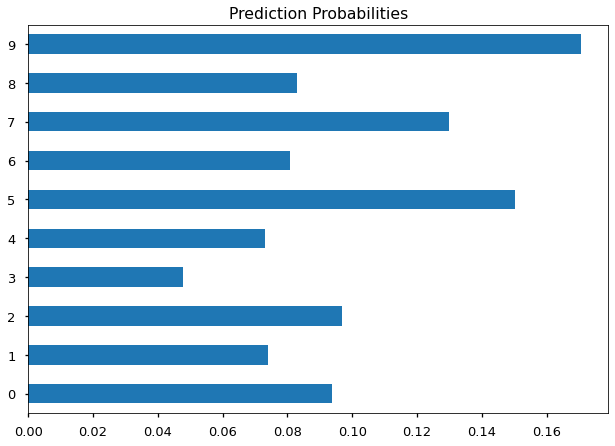

In [30]:
with plt.style.context('seaborn-talk'):
    fig, ax = plt.subplots()
    predictions_df['Softmax'].plot(kind='barh')
    ax.set(title='Prediction Probabilities')

In [31]:
# Functionalizing the above.
def plot_prediction_probabilities(trained_model, encoder, entry):
    """
    Show a bar chart representing prediction probabilities.
    """
    
    predictions_df = pd.DataFrame(
        zip(encoder.categories_[0], trained_model.predict(entry)[0]),
        columns=['Target', 'Softmax']
        )
    with plt.style.context('seaborn-talk'):
        fig, ax = plt.subplots()
        predictions_df['Softmax'].plot(kind='barh')
        ax.set(title='Prediction Probabilities')
        plt.show()

## Incorporating Validation Data

In [32]:
# Add validation data.
model.fit(X_train, y_train, validation_data=(X_val, y_val))

Train on 1259 samples, validate on 269 samples
1259/1259 [==============================] - 0s 160us/sample - loss: 2.2362 - acc: 0.1152 - val_loss: 2.1954 - val_acc: 0.1338


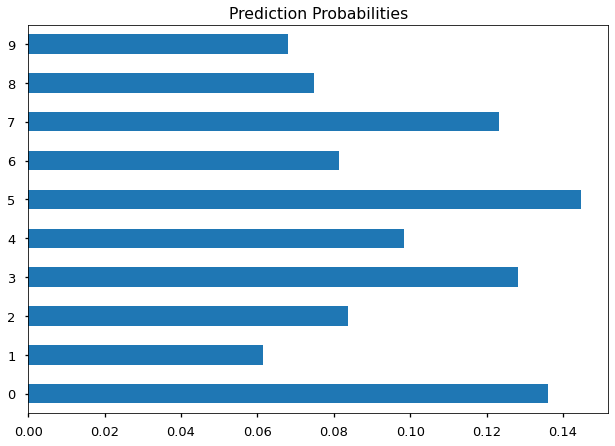

In [33]:
plot_prediction_probabilities(model, ohe, X_train[[0]])

## Add Epochs

In [34]:
# Save the model fit to a variable. Training info is stored here.
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5)

Train on 1259 samples, validate on 269 samples
Epoch 1/5
1259/1259 [==============================] - 0s 87us/sample - loss: 2.1811 - acc: 0.1350 - val_loss: 2.1354 - val_acc: 0.1561
Epoch 2/5
1259/1259 [==============================] - 0s 90us/sample - loss: 2.1238 - acc: 0.1660 - val_loss: 2.0799 - val_acc: 0.1970
Epoch 3/5
1259/1259 [==============================] - 0s 93us/sample - loss: 2.0669 - acc: 0.2216 - val_loss: 2.0189 - val_acc: 0.2565
Epoch 4/5
1259/1259 [==============================] - 0s 87us/sample - loss: 2.0059 - acc: 0.2844 - val_loss: 1.9543 - val_acc: 0.3197
Epoch 5/5
1259/1259 [==============================] - 0s 88us/sample - loss: 1.9404 - acc: 0.3471 - val_loss: 1.8833 - val_acc: 0.3494


In [35]:
history

In [36]:
history.history

{'loss': [2.1810838314538157,
  2.123759078449252,
  2.0669062207671174,
  2.0059264791305336,
  1.9404290569879594],
 'acc': [0.1350278, 0.16600476, 0.22160445, 0.28435266, 0.34710088],
 'val_loss': [2.135420240877286,
  2.0799460349029766,
  2.0188784812019662,
  1.9542526019993325,
  1.883296586323848],
 'val_acc': [0.15613383, 0.19702603, 0.25650558, 0.3197026, 0.3494424]}

In [37]:
def plot_history(history, style=['ggplot', 'seaborn-talk']):
    """
    Plot history from History object (or history dict) 
    once Tensorflow model is trained.
    
    Parameters:
    -----------
    history:
        History object returned from a model.fit()
    style: string or list of strings (default: ['ggplot', 'seaborn-talk'])
        Style from matplotlib.
    """
    
    # We can pass in a model history object or a dictionary.
    if not isinstance(history, dict): # We prefer this type of check over `if type() == ...`
        history = history.history

    metrics_lst = [m for m in history.keys() if not m.startswith('val')]
    N = len(metrics_lst)
    with plt.style.context(style):
        fig, ax_lst = plt.subplots(nrows=N, figsize=(8, 4*(N)))
        ax_lst = [ax_lst] if N == 1 else ax_lst.flatten() # Flatten ax_lst.
        for metric, ax in zip(metrics_lst, ax_lst):
            val_m = f'val_{metric}'
            ax.plot(history[metric], label=metric)
            ax.plot(history[val_m], label=val_m)
            ax.set(title=metric.title(), xlabel='Epoch', ylabel=metric.title())
            ax.legend()
        fig.tight_layout()
        plt.show()

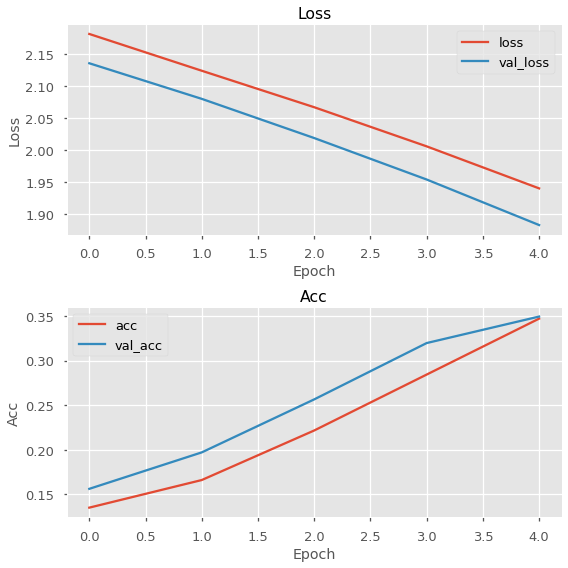

In [38]:
plot_history(history)

In [39]:
# Adding more epochs!
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 1259 samples, validate on 269 samples
Epoch 1/10
1259/1259 [==============================] - 0s 87us/sample - loss: 1.8642 - acc: 0.4059 - val_loss: 1.8103 - val_acc: 0.3494
Epoch 2/10
1259/1259 [==============================] - 0s 90us/sample - loss: 1.7904 - acc: 0.4186 - val_loss: 1.7382 - val_acc: 0.3903
Epoch 3/10
1259/1259 [==============================] - 0s 90us/sample - loss: 1.7186 - acc: 0.4567 - val_loss: 1.6681 - val_acc: 0.4201
Epoch 4/10
1259/1259 [==============================] - 0s 88us/sample - loss: 1.6497 - acc: 0.4837 - val_loss: 1.6040 - val_acc: 0.4610
Epoch 5/10
1259/1259 [==============================] - 0s 87us/sample - loss: 1.5859 - acc: 0.5131 - val_loss: 1.5433 - val_acc: 0.5056
Epoch 6/10
1259/1259 [==============================] - 0s 90us/sample - loss: 1.5228 - acc: 0.5338 - val_loss: 1.4868 - val_acc: 0.5167
Epoch 7/10
1259/1259 [==============================] - 0s 106us/sample - loss: 1.4663 - acc: 0.5552 - val_loss: 1.4356 - val_acc: 

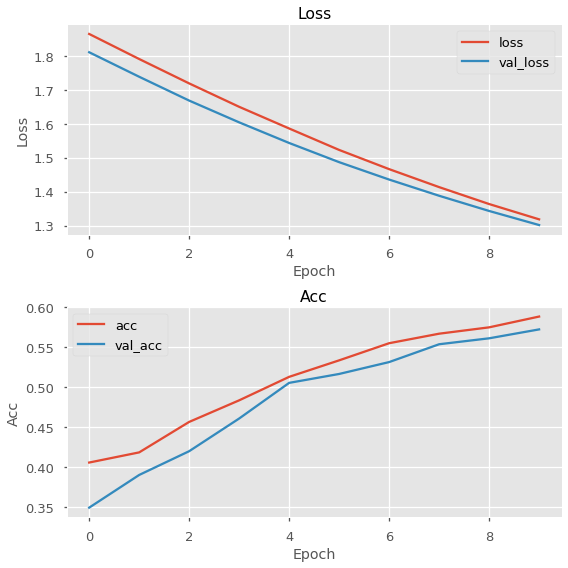

In [40]:
plot_history(history)

## Add Layers
There are no hard set rules for building neural networks. It is an empirical process, where one tries different architectures and see what works. However, it is a good idea to try out deep networks, since we know that successive layers find increasingly complex patterns.

In [41]:
# Building a new model with a hidden layer.
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                70        
Total params: 360
Trainable params: 360
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 1259 samples, validate on 269 samples
Epoch 1/10
1259/1259 [==============================] - 0s 321us/sample - loss: 2.2842 - acc: 0.0898 - val_loss: 2.2718 - val_acc: 0.0929
Epoch 2/10
1259/1259 [==============================] - 0s 96us/sample - loss: 2.2643 - acc: 0.1033 - val_loss: 2.2548 - val_acc: 0.0967
Epoch 3/10
1259/1259 [==============================] - 0s 95us/sample - loss: 2.2455 - acc: 0.1033 - val_loss: 2.2338 - val_acc: 0.0967
Epoch 4/10
1259/1259 [==============================] - 0s 97us/sample - loss: 2.2227 - acc: 0.1033 - val_loss: 2.2088 - val_acc: 0.0967
Epoch 5/10
1259/1259 [==============================] - 0s 95us/sample - loss: 2.1956 - acc: 0.1025 - val_loss: 2.1829 - val_acc: 0.0967
Epoch 6/10
1259/1259 [==============================] - 0s 105us/sample - loss: 2.1650 - acc: 0.1501 - val_loss: 2.1527 - val_acc: 0.1673
Epoch 7/10
1259/1259 [==============================] - 0s 92us/sample - loss: 2.1328 - acc: 0.2240 - val_loss: 2.1262 - val_acc:

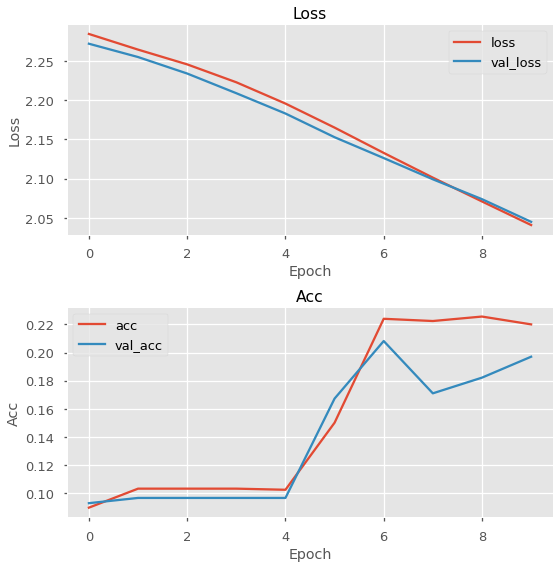

In [43]:
plot_history(history)

In [44]:
# Adding one more layer.
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 10)                70        
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 470
Trainable params: 470
Non-trainable params: 0
_________________________________________________________________


In [45]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 1259 samples, validate on 269 samples
Epoch 1/10
1259/1259 [==============================] - 0s 378us/sample - loss: 2.2955 - acc: 0.1128 - val_loss: 2.2876 - val_acc: 0.1413
Epoch 2/10
1259/1259 [==============================] - 0s 103us/sample - loss: 2.2666 - acc: 0.1446 - val_loss: 2.2546 - val_acc: 0.1561
Epoch 3/10
1259/1259 [==============================] - 0s 100us/sample - loss: 2.2214 - acc: 0.1827 - val_loss: 2.1966 - val_acc: 0.2305
Epoch 4/10
1259/1259 [==============================] - 0s 111us/sample - loss: 2.1499 - acc: 0.2280 - val_loss: 2.1181 - val_acc: 0.2454
Epoch 5/10
1259/1259 [==============================] - 0s 103us/sample - loss: 2.0619 - acc: 0.2613 - val_loss: 2.0278 - val_acc: 0.2788
Epoch 6/10
1259/1259 [==============================] - 0s 113us/sample - loss: 1.9630 - acc: 0.2867 - val_loss: 1.9272 - val_acc: 0.2825
Epoch 7/10
1259/1259 [==============================] - 0s 109us/sample - loss: 1.8530 - acc: 0.2979 - val_loss: 1.8195 - val

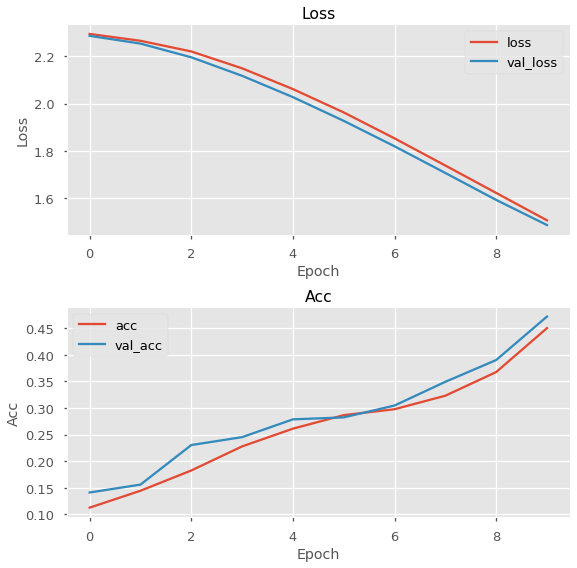

In [46]:
plot_history(history)

## Change Batch Size
By default, we use *batch gradient descent*. We can change this by altering the `batch_size` parameter.

### Mini-Batch

In [47]:
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [48]:
X_train.shape[0]

1259

In [49]:
# Full-batch.
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,
    batch_size=X_train.shape[0]
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/10
1259/1259 [==============================] - 0s 298us/sample - loss: 2.3030 - acc: 0.0890 - val_loss: 2.3023 - val_acc: 0.0223
Epoch 2/10
1259/1259 [==============================] - 0s 9us/sample - loss: 2.3024 - acc: 0.0866 - val_loss: 2.3018 - val_acc: 0.0335
Epoch 3/10
1259/1259 [==============================] - 0s 6us/sample - loss: 2.3018 - acc: 0.0866 - val_loss: 2.3014 - val_acc: 0.0483
Epoch 4/10
1259/1259 [==============================] - 0s 6us/sample - loss: 2.3012 - acc: 0.0921 - val_loss: 2.3009 - val_acc: 0.0743
Epoch 5/10
1259/1259 [==============================] - 0s 7us/sample - loss: 2.3006 - acc: 0.1056 - val_loss: 2.3004 - val_acc: 0.1004
Epoch 6/10
1259/1259 [==============================] - 0s 6us/sample - loss: 2.3001 - acc: 0.1096 - val_loss: 2.3001 - val_acc: 0.1115
Epoch 7/10
1259/1259 [==============================] - 0s 6us/sample - loss: 2.2996 - acc: 0.1120 - val_loss: 2.2997 - val_acc: 0.1078

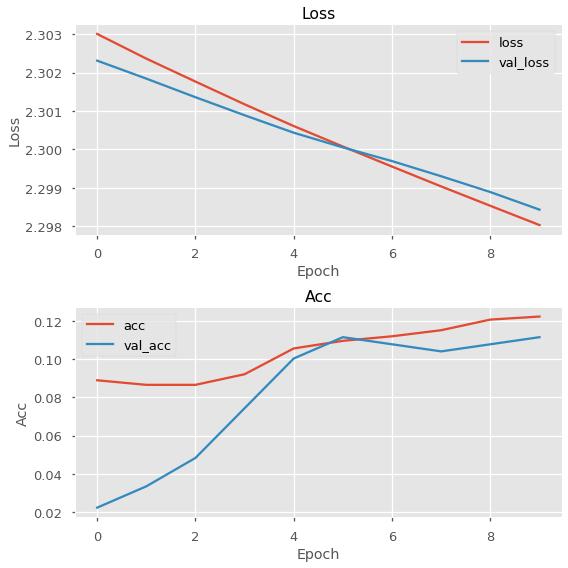

In [50]:
plot_history(history)

### Stochastic Gradient Descent

In [51]:
model = Sequential()
model.add(layers.Dense(units=4, activation='relu', input_dim=X_train.shape[1]))
model.add(layers.Dense(units=6, activation='relu'))
model.add(layers.Dense(units=10, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="RMSProp", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [52]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=10,
    batch_size=1
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 2.1772 - acc: 0.1739 - val_loss: 2.0026 - val_acc: 0.1636
Epoch 2/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 1.8331 - acc: 0.2462 - val_loss: 1.6726 - val_acc: 0.4015
Epoch 3/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 1.4903 - acc: 0.4948 - val_loss: 1.2508 - val_acc: 0.6394
Epoch 4/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 1.1297 - acc: 0.6497 - val_loss: 0.9650 - val_acc: 0.6877
Epoch 5/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 0.9075 - acc: 0.7021 - val_loss: 0.7309 - val_acc: 0.7658
Epoch 6/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 0.7982 - acc: 0.7331 - val_loss: 0.6701 - val_acc: 0.7695
Epoch 7/10
1259/1259 [==============================] - 4s 3ms/sample - loss: 0.7281 - acc: 0.7514 - val_loss: 0.6140 - val_acc: 0.7881
E

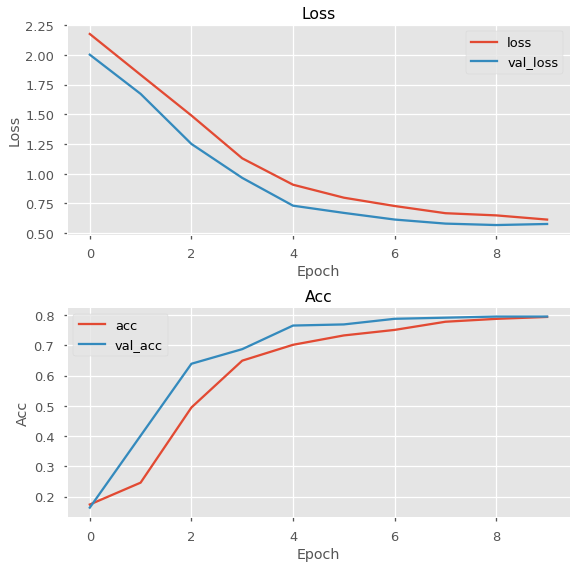

In [53]:
plot_history(history)

<a id='tuning'></a>
# Baseline Model - Before Tuning

In [54]:
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))

model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_20 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_21 (Dense)             (None, 10)                90        
Total params: 6,994
Trainable params: 6,994
Non-trainable params: 0
_________________________________________________________________


In [55]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/50
1259/1259 [==============================] - 1s 498us/sample - loss: 2.2561 - acc: 0.1946 - val_loss: 2.1710 - val_acc: 0.2119
Epoch 2/50
1259/1259 [==============================] - 0s 129us/sample - loss: 2.0519 - acc: 0.3169 - val_loss: 1.9031 - val_acc: 0.4126
Epoch 3/50
1259/1259 [==============================] - 0s 126us/sample - loss: 1.6891 - acc: 0.4766 - val_loss: 1.4977 - val_acc: 0.4721
Epoch 4/50
1259/1259 [==============================] - 0s 128us/sample - loss: 1.2728 - acc: 0.5568 - val_loss: 1.0997 - val_acc: 0.5911
Epoch 5/50
1259/1259 [==============================] - 0s 127us/sample - loss: 0.9577 - acc: 0.6823 - val_loss: 0.8113 - val_acc: 0.7546
Epoch 6/50
1259/1259 [==============================] - 0s 120us/sample - loss: 0.7268 - acc: 0.7768 - val_loss: 0.6245 - val_acc: 0.8141
Epoch 7/50
1259/1259 [==============================] - 0s 117us/sample - loss: 0.5587 - acc: 0.8133 - val_loss: 0.4861 - val

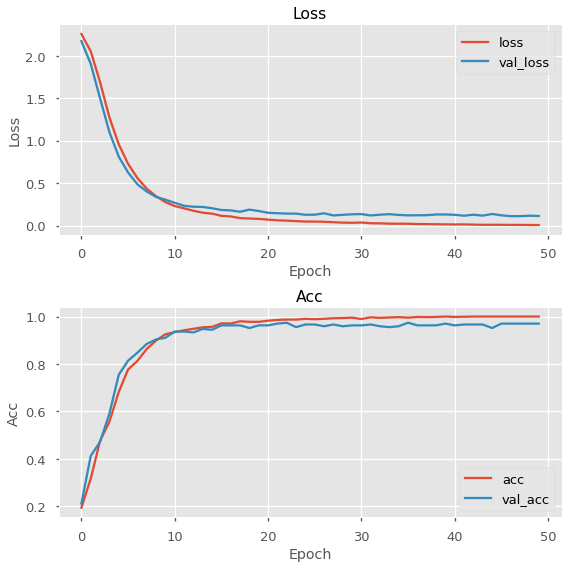

In [56]:
plot_history(history)

# Regularization

In [57]:
from tensorflow.keras import regularizers

In [58]:
# Adding a regularizer to the first hidden layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu', 
                       kernel_regularizer=regularizers.l2())) # L2 Regularizer
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_26 (Dense)             (None, 10)                90        
Total params: 6,994
Trainable params: 6,994
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/50
1259/1259 [==============================] - 1s 609us/sample - loss: 2.5777 - acc: 0.2240 - val_loss: 2.4049 - val_acc: 0.2007
Epoch 2/50
1259/1259 [==============================] - 0s 120us/sample - loss: 2.1969 - acc: 0.2510 - val_loss: 2.0328 - val_acc: 0.2454
Epoch 3/50
1259/1259 [==============================] - 0s 125us/sample - loss: 1.7684 - acc: 0.4567 - val_loss: 1.5631 - val_acc: 0.6134
Epoch 4/50
1259/1259 [==============================] - 0s 130us/sample - loss: 1.3200 - acc: 0.7307 - val_loss: 1.0903 - val_acc: 0.7844
Epoch 5/50
1259/1259 [==============================] - 0s 122us/sample - loss: 0.9611 - acc: 0.8189 - val_loss: 0.8153 - val_acc: 0.8513
Epoch 6/50
1259/1259 [==============================] - 0s 120us/sample - loss: 0.7564 - acc: 0.8531 - val_loss: 0.6728 - val_acc: 0.8885
Epoch 7/50
1259/1259 [==============================] - 0s 129us/sample - loss: 0.6390 - acc: 0.8944 - val_loss: 0.5815 - val

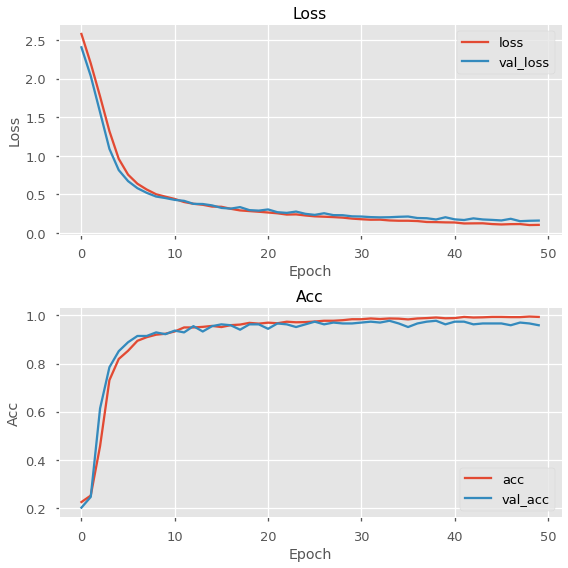

In [60]:
plot_history(history)

In [61]:
# Adding a regularizer to the each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dense(units=32, activation='relu', 
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=16, activation='relu',
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=8, activation='relu',
                       kernel_regularizer=regularizers.l2()))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/50
1259/1259 [==============================] - 1s 612us/sample - loss: 2.8605 - acc: 0.2137 - val_loss: 2.6443 - val_acc: 0.3680
Epoch 2/50
1259/1259 [==============================] - 0s 134us/sample - loss: 2.4561 - acc: 0.3598 - val_loss: 2.2074 - val_acc: 0.5167
Epoch 3/50
1259/1259 [==============================] - 0s 134us/sample - loss: 2.0245 - acc: 0.5703 - val_loss: 1.7476 - val_acc: 0.6543
Epoch 4/50
1259/1259 [==============================] - 0s 128us/sample - loss: 1.6019 - acc: 0.6728 - val_loss: 1.4020 - val_acc: 0.7323
Epoch 5/50
1259/1259 [==============================] - 0s 131us/sample - loss: 1.2975 - acc: 0.7625 - val_loss: 1.1681 - val_acc: 0.8067
Epoch 6/50
1259/1259 [==============================] - 0s 134us/sample - loss: 1.1119 - acc: 0.8118 - val_loss: 1.0414 - val_acc: 0.8401
Epoch 7/50
1259/1259 [==============================] - 0s 138us/sample - loss: 1.0012 - acc: 0.8435 - val_loss: 0.9445 - val

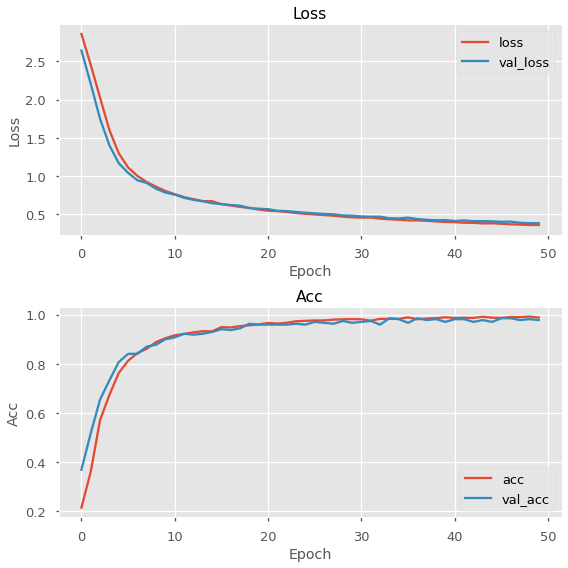

In [62]:
plot_history(history)

# Dropout
<img src='./images/drop_out.png'>

- *Adding dropout will randomly deactivate nodes during training in an attempt to strengthen and clarify the remaining active nodes.*

In [63]:
# Adding dropouts to each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/50
1259/1259 [==============================] - 1s 909us/sample - loss: 2.3146 - acc: 0.1168 - val_loss: 2.2860 - val_acc: 0.2193
Epoch 2/50
1259/1259 [==============================] - 0s 164us/sample - loss: 2.2912 - acc: 0.1342 - val_loss: 2.2689 - val_acc: 0.2528
Epoch 3/50
1259/1259 [==============================] - 0s 151us/sample - loss: 2.2659 - acc: 0.1477 - val_loss: 2.2181 - val_acc: 0.2937
Epoch 4/50
1259/1259 [==============================] - 0s 150us/sample - loss: 2.2161 - acc: 0.1946 - val_loss: 2.1258 - val_acc: 0.2900
Epoch 5/50
1259/1259 [==============================] - 0s 147us/sample - loss: 2.1624 - acc: 0.2073 - val_loss: 1.9930 - val_acc: 0.3532
Epoch 6/50
1259/1259 [==============================] - 0s 142us/sample - loss: 2.0746 - acc: 0.2407 - val_loss: 1.8526 - val_acc: 0.3941
Epoch 7/50
1259/1259 [==============================] - 0s 145us/sample - loss: 1.9948 - acc: 0.2637 - val_loss: 1.7575 - val

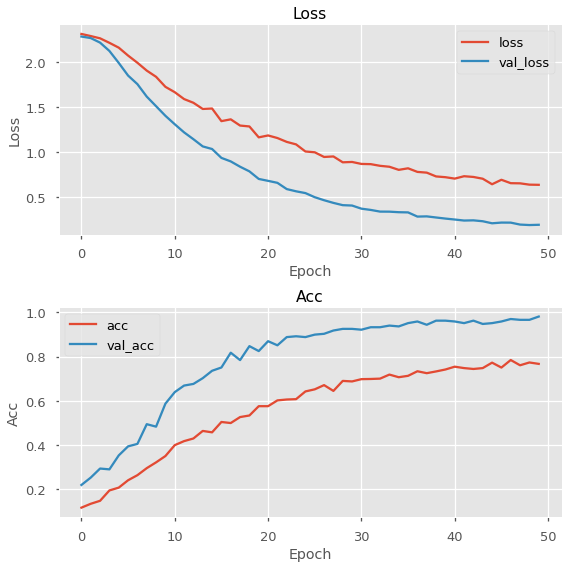

In [64]:
plot_history(history)

In [65]:
# Adding fewer dropouts to each layer.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=50,
    batch_size=32
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/50
1259/1259 [==============================] - 1s 887us/sample - loss: 2.2119 - acc: 0.1795 - val_loss: 2.0455 - val_acc: 0.3011
Epoch 2/50
1259/1259 [==============================] - 0s 151us/sample - loss: 1.9534 - acc: 0.2907 - val_loss: 1.6900 - val_acc: 0.4461
Epoch 3/50
1259/1259 [==============================] - 0s 160us/sample - loss: 1.6758 - acc: 0.3916 - val_loss: 1.3606 - val_acc: 0.5390
Epoch 4/50
1259/1259 [==============================] - 0s 163us/sample - loss: 1.4607 - acc: 0.4369 - val_loss: 1.1498 - val_acc: 0.5874
Epoch 5/50
1259/1259 [==============================] - 0s 150us/sample - loss: 1.2857 - acc: 0.5020 - val_loss: 0.9949 - val_acc: 0.5985
Epoch 6/50
1259/1259 [==============================] - 0s 155us/sample - loss: 1.1895 - acc: 0.5266 - val_loss: 0.8670 - val_acc: 0.6877
Epoch 7/50
1259/1259 [==============================] - 0s 148us/sample - loss: 1.0470 - acc: 0.6156 - val_loss: 0.7221 - val

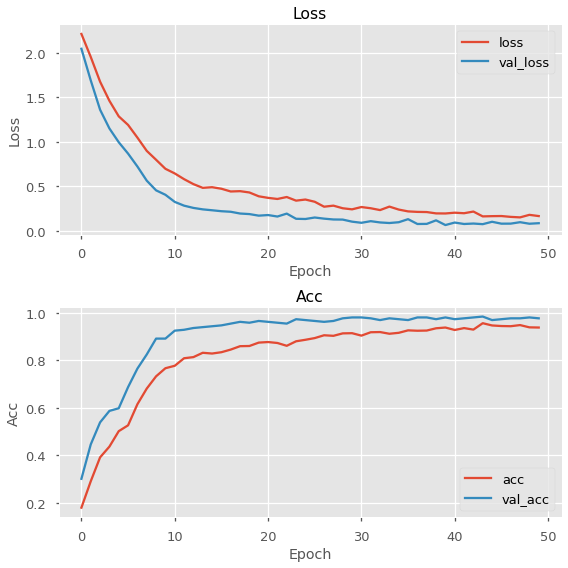

In [66]:
plot_history(history)

# Early Stopping
- *We can have the model stop training before the given number of epochs if it stops improving.*

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [68]:
# Adding EarlyStopping.
model = Sequential()
model.add(layers.Dense(units=64, activation='relu', 
                       input_dim=X_train.shape[1]))

model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=8, activation='relu'))

model.add(layers.Dense(units=10, activation='softmax'))
model.compile(
    optimizer="adam", 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

history = model.fit(
    X_train, 
    y_train, 
    validation_data=(X_val, y_val), 
    epochs=200,
    batch_size=32,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True, verbose=1)]
    )

Train on 1259 samples, validate on 269 samples
Epoch 1/200
1259/1259 [==============================] - 1s 770us/sample - loss: 2.1661 - acc: 0.1938 - val_loss: 2.0153 - val_acc: 0.2937
Epoch 2/200
1259/1259 [==============================] - 0s 138us/sample - loss: 1.7849 - acc: 0.3725 - val_loss: 1.5933 - val_acc: 0.4498
Epoch 3/200
1259/1259 [==============================] - 0s 140us/sample - loss: 1.3492 - acc: 0.5957 - val_loss: 1.1665 - val_acc: 0.6803
Epoch 4/200
1259/1259 [==============================] - 0s 133us/sample - loss: 0.9747 - acc: 0.7284 - val_loss: 0.8306 - val_acc: 0.7807
Epoch 5/200
1259/1259 [==============================] - 0s 138us/sample - loss: 0.6920 - acc: 0.8141 - val_loss: 0.5931 - val_acc: 0.8364
Epoch 6/200
1259/1259 [==============================] - 0s 133us/sample - loss: 0.5082 - acc: 0.8499 - val_loss: 0.4460 - val_acc: 0.8736
Epoch 7/200
1259/1259 [==============================] - 0s 138us/sample - loss: 0.3985 - acc: 0.8801 - val_loss: 0.385

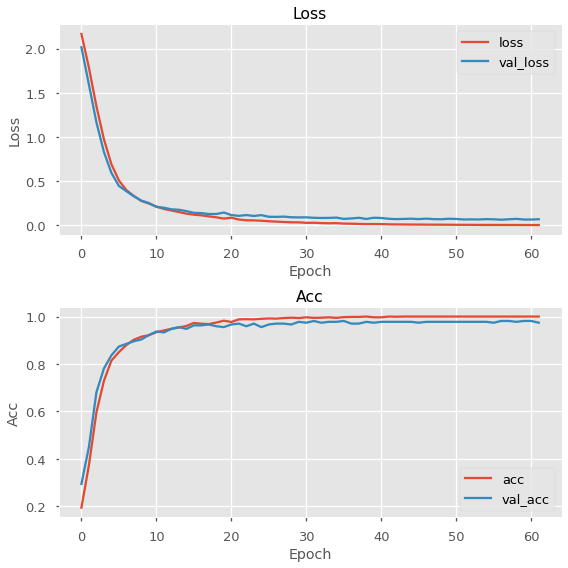

In [69]:
plot_history(history)